In [ ]:
from rcv_cruncher import STVFractionalBallot, rank_column_csv

# CVR file assumed to be downloaded and in current working directory
cvr_file = 'tabulator_input/PierceCounty_11032009_CountyAuditor.csv'
out_dir = 'tabulator_output/PierceCountyCountyAuditor.csv'

# the constructor for the election class will run the tabulation
election = STVFractionalBallot(
     jurisdiction='Pierce',
     state='WA',
     year='2022',
     office='County Auditor',
     parser_func=rank_column_csv,
     parser_args={'cvr_path': cvr_file},
     exhaust_on_duplicate_candidate_marks=False,
     exhaust_on_overvote_marks=False,
     exhaust_on_N_repeated_skipped_marks=0,
     n_winners=1
 )

# save a csv table of the results to out_dir
STVFractionalBallot.write_round_by_round_table(election, out_dir)

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets 
import matplotlib.pyplot as plt

table = pd.read_csv("tabulator_input/PierceCounty_11042008_CountyAssessorTreasurer.csv")
#table.head()

possible = ["rank1","rank2","rank3"]
table = table[possible]
#table.head()

cast_vote_record_matrix = np.zeros((len(table.index),3))
#print(cast_vote_record_matrix)

a = table["rank1"][0]
print(a)

b = table["rank2"][0]
print(b)

c = table["rank3"][0]
print(c)

for row in table.index:
    #print(row)
    #print(table["rank1"][row], table["rank2"][row], table["rank3"][row])

    r_1 = table["rank1"][row]
    r_2 = table["rank2"][row]
    r_3 = table["rank3"][row]

    if row == 0 and r_1 == a and r_2 == b and r_3 == c:
        cast_vote_record_matrix[0] = [1, 1, 1]
    
    # AB
    if r_1 == a and (r_2 == b or r_3 == b) or r_2 == a and r_3 == b:
        cast_vote_record_matrix[row][0] = 1
    if r_1 == b and (r_2 == a or r_3 == a) or r_2 == b and r_3 == a:
        cast_vote_record_matrix[row][0] = -1

    # BC
    if r_1 == b and (r_2 == c or r_3 == c) or r_2 == b and r_3 == c:
        cast_vote_record_matrix[row][1] = 1
    if r_1 == c and (r_2 == b or r_3 == b) or r_2 == c and r_3 == b:
        cast_vote_record_matrix[row][1] = -1
    
    # AC
    if r_1 == a and (r_2 == c or r_3 == c) or r_2 == a and r_3 == c:
        cast_vote_record_matrix[row][2] = 1
    if r_1 == c and (r_2 == a or r_3 == a) or r_2 == c and r_3 == a:
        cast_vote_record_matrix[row][2] = -1

print(cast_vote_record_matrix)

Terry Lee
Bernardo Tuma
Dale Washam
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

reduced_data = pca.fit_transform(cast_vote_record_matrix)

scaler = StandardScaler()
scaler.fit(table)
data_scaled = scaler.transform(table)

print(reduced_data)

[[ 1.21626434 -0.35922155]
 [ 0.03305852  0.01910049]
 [ 0.03305852  0.01910049]
 ...
 [ 0.03305852  0.01910049]
 [ 0.03305852  0.01910049]
 [ 0.03305852  0.01910049]]


In [13]:
some = np.corrcoef(cast_vote_record_matrix)

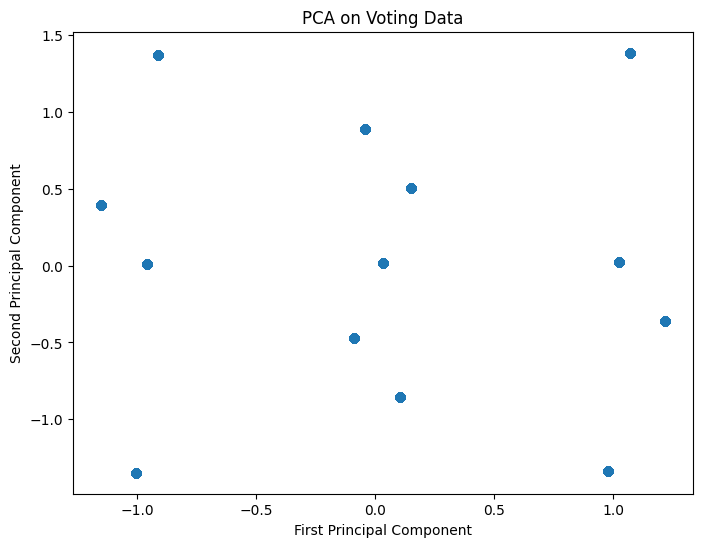

In [7]:
import matplotlib.pyplot as plt

x = reduced_data[:, 0]
y = reduced_data[:, 1]

plt.figure(figsize=(8,6))

plt.scatter(x, y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Voting Data')

plt.show()

In [15]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="myGeocoder")

def get_location_by_city(city_name):
    location_list = geolocator.geocode(city_name, exactly_one=False)
    return location_list

location_list = get_location_by_city("Genola")

for i, location in enumerate(location_list):
    print(f"{i}: {location}")

selection = int(input("Please select a location: "))
selected_location = location_list[selection]

print(f"You selected: {selected_location}")

print(selected_location.address)

print((selected_location.latitude, selected_location.longitude))

0: Genola, Cuneo, Piemonte, Italia
1: Genola, Morrison County, Minnesota, United States
2: Genola, Morrison County, Minnesota, United States
3: Genola, Utah County, Utah, United States
4: Genola, Via Monginevro, Rione Lancia, Circoscrizione 3, Torino, Piemonte, 10141, Italia


ValueError: invalid literal for int() with base 10: ''

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

# Load and preprocess your data
# We will use pandas to load the csv files
cvr_data = pd.read_csv('cvr.csv')
labels_data = pd.read_csv('labels.csv')

# Normalize and preprocess data here

# Assuming that 'cvr_data' and 'labels_data' are NumPy arrays or pandas dataframes
# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

dataset = CustomDataset(cvr_data, labels_data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the generator and the discriminator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # Define architecture here

    def forward(self, z, labels):
        # Use the noise and label inputs to generate fake data
        pass

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # Define architecture here

    def forward(self, x, labels):
        # Use the data and label inputs to classify the data as real or fake
        pass

# Instantiate models
generator = Generator()
discriminator = Discriminator()

# Define loss function and optimizers
loss_function = nn.BCELoss()
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

# Training loop
num_epochs = 100  # Set the number of epochs

for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(dataloader):
        # Train models here
        pass
